In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
train_data=pd.read_csv('Train.csv')
df=train_data.copy()
df.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


The holiday season is just around the corner—Christmas trees have been decorated, lights and wreaths hung, streets all decked up, Santa costumes rented out, and holiday cards in the mailbox. In light of this holiday cheer, retail brands, big and small, want to earn considerable profits, and therefore, are investing significantly in advertising. These brands have approached an advertising agency to plan and execute ad campaigns that will help them increase the footfall in their stores.

You have been hired by this advertising agency to assess the scope of revenue that can be generated by a proposed ad. Based on the demographic information provided, you need to predict whether the revenue generated will cover costs to produce and air the ad. This will help guide decision making for the firm, as they will want to pursue ads that are likely to generate a net gain for their clients— thereby bolstering the advertising firm’s reputation.

Task:
This is a binary classification problem where you need to predict whether an ad buy will lead to a netgain.

In [3]:
# id  ----># Unique id for each row

# ratings------># Metric out of 1 which represents how much of the targeted demographic watched the advertisement

# airlocation------># Country of origin

# airtime-------># Time when the advertisement was aired

# average_runtime(minutes_per_week)-------># Minutes per week the advertisement was aired

# targeted_sex-----------># Sex that was mainly targeted for the advertisement

# genre---------># The type of advertisement

# industry--------># The industry to which the product belonged

# economic_status---------># The economic health during which the show aired

# relationship_status-------------># The relationship status of the most responsive customers to the advertisement

# expensive-------># A general measure of how expensive the product or service is that the ad is discussing.

# money_back_guarantee---------># Whether or not the product offers a refund in the case of customer dissatisfaction.

# netgain [target]-------># Whether the ad will incur a gain or loss when sold

In [4]:
# df['realtionship_status'].value_counts()(7)

In [5]:
# df['industry'].value_counts()(6)

In [6]:
# df['genre'].value_counts()(5)

In [7]:
df['targeted_sex'].value_counts()

Male      17245
Female     8803
Name: targeted_sex, dtype: int64

In [8]:
df['airtime'].value_counts()

Primetime    15652
Morning       8531
Daytime       1865
Name: airtime, dtype: int64

In [9]:
# df['airlocation'].value_counts()

In [10]:
df['netgain'].value_counts()

False    19853
True      6195
Name: netgain, dtype: int64

In [11]:
df.columns

Index(['id', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [12]:
cat_cols=[['realtionship_status', 'industry', 'genre', 'targeted_sex','airtime', 'airlocation','expensive', 'money_back_guarantee', 'netgain']]

In [13]:
# df['airtime'].value_counts().plot(kind='bar')

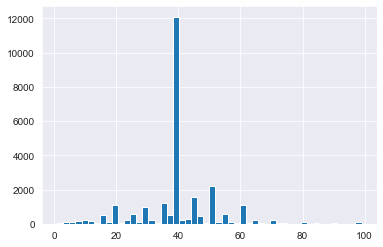

In [14]:
df['average_runtime(minutes_per_week)'].hist(bins=50)

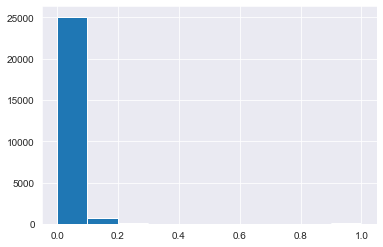

In [20]:
df['ratings'].hist(bins=10)

In [31]:
import re
def preprocess_text(data):
    text=str(data).lower()
    text=re.sub(r'[^a-z0-9]',' ',text)
    return text


In [32]:

df['airlocation']=df['airlocation'].apply(preprocess_text)

In [41]:
df['airlocation'].value_counts()

united states                 23250
mexico                          523
international                   465
philippines                     141
germany                         114
canada                           94
cuba                             86
puerto rico                      85
el salvador                      84
india                            81
england                          79
italy                            70
south                            69
poland                           66
jamaica                          63
dominican republic               62
guatemala                        61
vietnam                          57
columbia                         55
japan                            54
china                            53
taiwan                           37
iran                             36
haiti                            35
ecuador                          31
portugal                         30
nicaragua                        28
peru                        

In [42]:
df=df[df['airlocation']!='outlying us guam usvi etc']

In [44]:
df['realtionship_status']=df['realtionship_status'].apply(preprocess_text)
df['industry']=df['industry'].apply(preprocess_text)
df['genre']=df['genre'].apply(preprocess_text)
df['targeted_sex']=df['targeted_sex'].apply(preprocess_text)
df['airtime']=df['airtime'].apply(preprocess_text)
df['airlocation']=df['airlocation'].apply(preprocess_text)
df['expensive']=df['expensive'].apply(preprocess_text)
df['money_back_guarantee']=df['money_back_guarantee'].apply(preprocess_text)

In [45]:
# df.isnull().sum()

In [46]:
df.columns

Index(['id', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [48]:
df['Advertisement_Info']=df['realtionship_status']+' '+df['industry']+' '+df['genre']+' '+df['targeted_sex']+' '+df['airtime']+' '+df['airlocation']+' '+df['expensive']+' '+df['money_back_guarantee']

In [51]:
df['Advertisement_Info'][2]

'divorced entertainment comedy female primetime united states high yes'

In [52]:
df.drop([ 'realtionship_status', 'industry', 'genre', 'targeted_sex','airtime', 'airlocation','expensive', 'money_back_guarantee'],1,inplace=True)

In [54]:
df.drop('id',1,inplace=True)

In [55]:
df.head()

,average_runtime(minutes_per_week),ratings,netgain,Advertisement_Info
0,45,0.027465,False,married spouse absent auto comedy male primeti...
1,45,0.027465,False,married civ spouse pharma comedy male primetim...
2,45,0.027465,False,divorced entertainment comedy female primetime...
3,40,0.027465,False,separated political infomercial female primeti...
4,48,0.027465,True,married civ spouse pharma comedy male primetim...


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
vector = TfidfVectorizer(max_features = 500, min_df = 1, max_df = 0.4,ngram_range = (1,2))
X_text = vector.fit_transform(df['Advertisement_Info']).toarray()

In [60]:
df_num=df[['average_runtime(minutes_per_week)','ratings']]

In [61]:
df_num=np.array(df_num)

In [62]:
df_num

array([[4.50000000e+01, 2.74646723e-02],
       [4.50000000e+01, 2.74646723e-02],
       [4.50000000e+01, 2.74646723e-02],
       ...,
       [2.50000000e+01, 1.02233936e-01],
       [4.80000000e+01, 2.74646723e-02],
       [4.00000000e+01, 2.74646723e-02]])

In [63]:
X = np.concatenate((X_text,df_num),axis = 1)
X

array([[4.31731449e-01, 4.83674986e-01, 0.00000000e+00, ...,
        0.00000000e+00, 4.50000000e+01, 2.74646723e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.50000000e+01, 2.74646723e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.50000000e+01, 2.74646723e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.50000000e+01, 1.02233936e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.80000000e+01, 2.74646723e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.00000000e+01, 2.74646723e-02]])

In [64]:
X.shape

(26048, 396)

In [65]:
y=df.netgain

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [76]:
class_weights=class_weight=dict({'true':1,'false':100})

In [77]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_jobs = -1, random_state = 42, n_estimators = 500, verbose = 1, max_features = 'log2')
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   21.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.7s finished


0.8601288231028452

In [78]:
y_pred=clf.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.3s finished


0.7957773512476007

In [79]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1985
        True       0.59      0.45      0.51       620

    accuracy                           0.80      2605
   macro avg       0.72      0.68      0.69      2605
weighted avg       0.78      0.80      0.79      2605



In [80]:
#We didn't acheive a good accuracy, let's try Sampling and handling of imbalanced dataset

In [81]:
from imblearn.over_sampling import RandomOverSampler

In [100]:
os=RandomOverSampler(0.75)
from collections import Counter
X_train_os,y_train_os=os.fit_sample(X_train,y_train)
print("the number of classes before fit {}".format(Counter(y_train)))
print("the number of classes after fit {}".format(Counter(y_train_os)))

the number of classes before fit Counter({False: 17868, True: 5575})
the number of classes after fit Counter({False: 17868, True: 13401})


In [101]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_jobs = -1, random_state = 42, n_estimators = 500, verbose = 1, max_features = 'log2')
classifier.fit(X_train_os,y_train_os)                           

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   23.1s finished


RandomForestClassifier(max_features='log2', n_estimators=500, n_jobs=-1,
                       random_state=42, verbose=1)

In [102]:
classifier.score(X_train_os,y_train_os)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.3s finished


0.8489878154082318

In [103]:
y_preds=classifier.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test,y_preds)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


0.7631477927063339

In [104]:
print(metrics.classification_report(y_test,y_preds))

              precision    recall  f1-score   support

       False       0.90      0.78      0.83      1985
        True       0.50      0.71      0.59       620

    accuracy                           0.76      2605
   macro avg       0.70      0.75      0.71      2605
weighted avg       0.80      0.76      0.78      2605



In [88]:
from imblearn.combine import SMOTETomek

In [89]:
sm=SMOTETomek(0.75)
X_train_sm,y_train_sm=sm.fit_sample(X_train,y_train)
print("the number of classes before fit {}".format(Counter(y_train)))
print("the number of classes after fit {}".format(Counter(y_train_sm)))

the number of classes before fit Counter({False: 17868, True: 5575})
the number of classes after fit Counter({False: 17681, True: 13214})


In [90]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_sm,y_train_sm)                           

RandomForestClassifier()

In [91]:
classifier.score(X_train_sm,y_train_sm)

0.8614986243728758

In [92]:
y_predss=classifier.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test,y_predss)

0.7804222648752399

In [93]:
print(metrics.classification_report(y_test,y_predss))

              precision    recall  f1-score   support

       False       0.90      0.80      0.85      1985
        True       0.53      0.73      0.61       620

    accuracy                           0.78      2605
   macro avg       0.72      0.76      0.73      2605
weighted avg       0.81      0.78      0.79      2605



In [94]:
#our f1 score increased here (NOtice)

In [95]:
from imblearn.ensemble import EasyEnsembleClassifier

In [96]:
easy=EasyEnsembleClassifier()
easy.fit(X_train,y_train)

EasyEnsembleClassifier()

In [98]:
y_preda=easy.predict(X_test)
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test,y_preda))
print("\n")
print("accuracy Score:")
print(metrics.accuracy_score(y_test,y_preda))
print("\n")
print(metrics.classification_report(y_test,y_preda))

Confusion Matrix:
[[1487  498]
 [ 115  505]]


accuracy Score:
0.7646833013435701


              precision    recall  f1-score   support

       False       0.93      0.75      0.83      1985
        True       0.50      0.81      0.62       620

    accuracy                           0.76      2605
   macro avg       0.72      0.78      0.73      2605
weighted avg       0.83      0.76      0.78      2605



In [99]:
#Our F-1 score improved here also..

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [106]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,shuffle=False,random_state=None)

In [107]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [108]:
clf.score(X_train,y_train)

0.6867933715604103

In [109]:
y_pred=clf.predict(X_test)

In [110]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("\n")
print("accuracy Score:")
print(accuracy_score(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[1829  156]
 [ 355  265]]


accuracy Score:
0.8038387715930903


              precision    recall  f1-score   support

       False       0.84      0.92      0.88      1985
        True       0.63      0.43      0.51       620

    accuracy                           0.80      2605
   macro avg       0.73      0.67      0.69      2605
weighted avg       0.79      0.80      0.79      2605



In [111]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)

In [118]:
param = {'objective': 'multiclass',
         'num_iterations': 80,
         'learning_rate': 0.03,  
         'num_leaves': 15,
         'max_depth': 15, 
         'min_data_in_leaf': 25, 
         'max_bin': 20, 
         'min_data_in_bin': 3,   
         'num_class': 2,
         'metric': 'multi_logloss'
         }

In [119]:
lgbm = lgb.train(params=param, 
                 train_set=train_data)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3139
[LightGBM] [Info] Number of data points in the train set: 23443, number of used features: 186
[LightGBM] [Info] Start training from score -0.271561
[LightGBM] [Info] Start training from score -1.436280


In [120]:
pred=lgbm.predict(X_test)

In [121]:
pred

array([[0.59648976, 0.40351024],
       [0.95773078, 0.04226922],
       [0.9712024 , 0.0287976 ],
       ...,
       [0.9712024 , 0.0287976 ],
       [0.505933  , 0.494067  ],
       [0.79060718, 0.20939282]])

In [122]:
from xgboost import XGBClassifier
#for x in range(2,20):
xgb = XGBClassifier(base_score=0.5, booster='dart',num_class=5, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, bagging_fraction=0.8,bagging_freq=1,max_bin= 255, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softmax', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1, predictor='gpu_predictor')

#Training the classifier
xgb.fit(X_train,y_train)

[21:35:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:207: No visible GPU is found, setting `gpu_id` to -1
[21:35:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { bagging_fraction, bagging_freq, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:37:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\gbm\gbtree.cc:336: Loading from a raw memory buffer on CPU only machine.  Changing predictor to auto.


XGBClassifier(bagging_fraction=0.8, bagging_freq=1, base_score=0.5,
              booster='dart', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_bin=255,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
              monotone_constraints='()', n_estimators=100, n_jobs=1, nthread=1,
              num_class=5, num_parallel_tree=1, objective='multi:softmax',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, ...)

In [128]:
xgb.score(X_train_sm,y_train_sm)

0.7307007606408804

In [129]:
y_pred=xgb.predict(X_test)

In [130]:
accuracy_score(y_test,y_pred)

0.8172744721689059

In [131]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.84      0.93      0.89      1985
        True       0.67      0.45      0.54       620

    accuracy                           0.82      2605
   macro avg       0.76      0.69      0.71      2605
weighted avg       0.80      0.82      0.80      2605

